In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

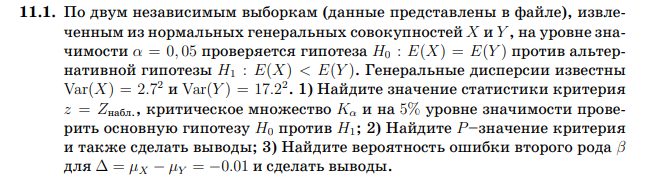


In [2]:
sample = pd.read_csv('sample_11_1_XY.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [3]:
sample

,0,1
0,4.850518,-17.844697
1,2.973374,9.241012
2,1.739160,-13.196742
3,2.947097,10.705654
4,5.801976,33.152683
...,...,...
295,10.270175,NaN
296,6.372963,NaN
297,2.287030,NaN
298,3.688255,NaN


In [4]:
#E(X) < E(Y)
alpha = 0.05
Ymean = sample[1].mean()
Xmean = sample[0].mean()
n = sample[0].dropna().size
m = sample[1].dropna().size
sigmaX = 2.7
sigmaY = 17.2
Zstat = (Xmean - Ymean) / ((sigmaX**2 / n) + (sigmaY**2 / m))**0.5
cvalue = -st.norm.isf(0.05)
if Zstat > cvalue:
    print(f'Гипотеза H0 о равенстве средних не отклоняется, значение Z-статистики равно {Zstat}, \
оно не входит в критическую область\n(-inf; {cvalue}]')
else:
    print(f'Гипотеза H0 о равенстве средних отклоняется, значение Z-статистики равно {Zstat}, \
оно входит в критическую область \n(-inf; {cvalue}]')

Гипотеза H0 о равенстве средних не отклоняется, значение Z-статистики равно -0.7452574454846034, оно не входит в критическую область
(-inf; -1.6448536269514729]


In [5]:
pvalue = st.norm.cdf(Zstat)
if pvalue > alpha:
    print(f'Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value\
, равный {pvalue}, больше уровня значимости alpha')
else:
    print(f'Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value\
, равный {pvalue}, меньше уровня значимости alpha')

Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value, равный 0.22805805063538087, больше уровня значимости alpha


In [6]:
delta = -0.01
B = st.norm.cdf(st.norm.isf(0.05) + ((n * m) / (m * sigmaX**2 + n * sigmaY**2))**0.5 * delta)
print(f'Вероятность ошибки второго радо равна {B}, это может значить, что разность между средними\
значениями генеральных\n совокупностей близка к {delta}')

Вероятность ошибки второго радо равна 0.9491532242583798, это может значить, что разность между среднимизначениями генеральных
 совокупностей близка к -0.01


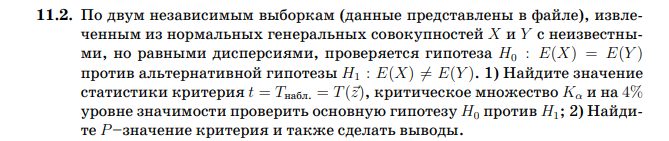

In [7]:
sample = pd.read_csv('sample_11_2_XY.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [8]:
sample

,0,1
0,-5.373397,-4.846481
1,-24.545615,-0.820939
2,-0.802851,22.656087
3,4.265231,9.088802
4,2.094642,4.045747
5,2.996778,1.863085
6,-9.620434,5.841623
7,NaN,16.223898
8,NaN,2.084858


In [9]:
alpha = 0.04
X = sample[0].dropna()
Y = sample[1].dropna()
Ymean = Y.mean()
Xmean = X.mean()
n = X.size
m = Y.size
SX = (X.var(ddof = 1))**0.5
SY = (Y.var(ddof = 1))**0.5
S_pooled = ((n - 1) / (n + m -2) * SX**2 + (m - 1) / (n + m -2) * SY**2)**0.5
Tstat = (Xmean - Ymean) / (S_pooled * (1/n + 1/m)**0.5)
cvalue = st.t(n + m - 2).isf(alpha/2)
if (Tstat < cvalue) and (Tstat > -cvalue):
    print(f'Гипотеза H0 о равенстве средних не отклоняется, значение T-статистики равно {Tstat}, \
оно не входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')
else:
    print(f'Гипотеза H0 о равенстве средних отклоняется, значение T-статистики равно {Tstat}, \
оно входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')

Гипотеза H0 о равенстве средних отклоняется, значение T-статистики равно -2.2757593115433274, оно входит в критическую область
(-inf; -2.263781279009663], [2.263781279009663 ; inf)


In [10]:
pvalue1 = st.t(n + m - 2).cdf(Tstat)
pvalue2 = st.t(n + m - 2).sf(Tstat)
pvalue = 2 * min(pvalue1, pvalue2)
if pvalue > alpha:
    print(f'Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value\
, равный {pvalue}, больше уровня значимости alpha')
else:
    print(f'Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value\
, равный {pvalue}, меньше уровня значимости alpha')

Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value, равный 0.039104712196068044, меньше уровня значимости alpha


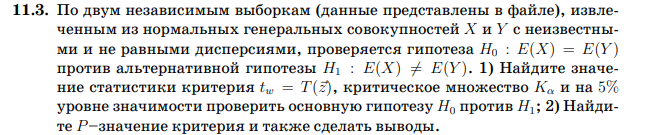

In [11]:
sample = pd.read_csv('sample_11_3_XY.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [12]:
sample

,0,1
0,-15.150226,13.885537
1,-3.400070,10.702753
2,-8.550064,8.670199
3,-19.216233,7.589839
4,5.648119,7.774256
5,-14.615840,14.438547
6,-17.619797,8.280315
7,16.491683,11.390809
8,3.990775,16.392433
9,-12.973780,16.863755


In [13]:
alpha = 0.05
X = sample[0].dropna()
Y = sample[1].dropna()
Ymean = Y.mean()
Xmean = X.mean()
n = X.size
m = Y.size
SX = (X.var(ddof = 1))**0.5
SY = (Y.var(ddof = 1))**0.5
S_Welch = (SX**2/n + SY**2/m)**0.5
Tstat_Welch = (Xmean - Ymean) / S_Welch
f_hat = S_Welch**4 / ((SX**4 / (n**2 * (n - 1))) + (SY**4 / (m**2 * (m - 1))))
cvalue = S_Welch * st.t(f_hat).isf(alpha/2)
if ((Xmean - Ymean) < cvalue) and ((Xmean - Ymean) > -cvalue):
    print(f'Гипотеза H0 о равенстве средних не отклоняется, значение разности средних равно {Xmean - Ymean}, \
оно не входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')
else:
    print(f'Гипотеза H0 о равенстве средних отклоняется, значение разности средних равно {Xmean - Ymean}, \
оно входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')
print(f'Значение статистики T-Welch равно {Tstat_Welch}')

Гипотеза H0 о равенстве средних отклоняется, значение разности средних равно -18.076658711951517, оно входит в критическую область
(-inf; -7.685473820252178], [7.685473820252178 ; inf)
Значение статистики T-Welch равно -5.166795565736608


In [14]:
pvalue1 = st.t(f_hat).cdf(Tstat_Welch)
pvalue2 = st.t(f_hat).sf(Tstat_Welch)
pvalue = 2 * min(pvalue1, pvalue2)
if pvalue > alpha:
    print(f'Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value\
, равный {pvalue}, больше уровня значимости alpha')
else:
    print(f'Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value\
, равный {pvalue}, меньше уровня значимости alpha')

Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value, равный 0.00029444309499353504, меньше уровня значимости alpha


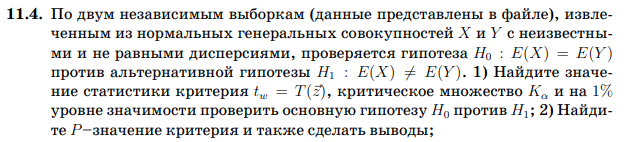

In [15]:
sample = pd.read_csv('sample_11_4_XY.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [16]:
sample

,0,1
0,16.148154,23.311749
1,15.239861,24.208777
2,15.984269,24.136966
3,46.691057,28.808292
4,23.747293,28.068633
5,28.360236,17.817507
6,12.756945,28.074726
7,29.688829,23.536918
8,37.301532,22.982604
9,25.947037,NaN


In [17]:
alpha = 0.01
X = sample[0].dropna()
Y = sample[1].dropna()
Ymean = Y.mean()
Xmean = X.mean()
n = X.size
m = Y.size
SX = (X.var(ddof = 1))**0.5
SY = (Y.var(ddof = 1))**0.5
S_Welch = (SX**2/n + SY**2/m)**0.5
Tstat_Welch = (Xmean - Ymean) / S_Welch
f_hat = S_Welch**4 / ((SX**4 / (n**2 * (n - 1))) + (SY**4 / (m**2 * (m - 1))))
cvalue = S_Welch * st.t(f_hat).isf(alpha/2)
if ((Xmean - Ymean) < cvalue) and ((Xmean - Ymean) > -cvalue):
    print(f'Гипотеза H0 о равенстве средних не отклоняется, значение разности средних равно {Xmean - Ymean}, \
оно не входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')
else:
    print(f'Гипотеза H0 о равенстве средних отклоняется, значение разности средних равно {Xmean - Ymean}, \
оно входит в критическую область\n(-inf; {-cvalue}], [{cvalue} ; inf)')
print(f'Значение статистики T-Welch равно {Tstat_Welch}')

Гипотеза H0 о равенстве средних не отклоняется, значение разности средних равно 1.5596144990196095, оно не входит в критическую область
(-inf; -6.910627494715022], [6.910627494715022 ; inf)
Значение статистики T-Welch равно 0.6346186667119256


In [18]:
pvalue1 = st.t(f_hat).cdf(Tstat_Welch)
pvalue2 = st.t(f_hat).sf(Tstat_Welch)
pvalue = 2 * min(pvalue1, pvalue2)
if pvalue > alpha:
    print(f'Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value\
, равный {pvalue}, больше уровня значимости alpha')
else:
    print(f'Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value\
, равный {pvalue}, меньше уровня значимости alpha')

Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value, равный 0.532054842325337, больше уровня значимости alpha


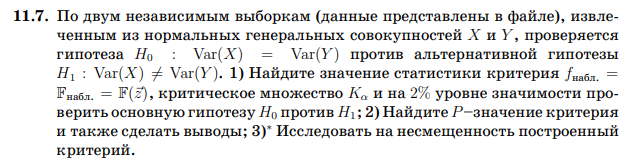

In [52]:
sample = pd.read_csv('sample_11_7_XY.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')

In [53]:
sample

,0,1
0,7.188667,-7.605944
1,4.242335,0.185860
2,7.807626,-3.786147
3,-1.546366,-4.009095
4,6.055967,-20.480883
5,0.231936,-9.377649
6,4.277352,-17.569721
7,3.670909,-8.912688
8,6.765488,-30.569440
9,6.835586,-16.733122


In [54]:
alpha = 0.02
X = sample[0].dropna()
Y = sample[1].dropna()
Ymean = Y.mean()
Xmean = X.mean()
n = X.size
m = Y.size
SX = (X.var(ddof = 1))**0.5
SY = (Y.var(ddof = 1))**0.5
Fstat = SX**2 / SY**2 
cvalue1 = st.f(n - 1, m - 1).isf(1 - alpha/2)
cvalue2 = st.f(n - 1, m - 1).isf(alpha/2)
if (Fstat < cvalue2) and (Fstat > cvalue1):
    print(f'Гипотеза H0 о равенстве средних не отклоняется, значение F-статистики равно {Fstat}, \
оно не входит в критическую область\n(0; {cvalue1}], [{cvalue2} ; inf)')
else:
    print(f'Гипотеза H0 о равенстве средних отклоняется, значение F-статистики равно {Fstat}, \
оно входит в критическую область\n(0; {cvalue1}], [{cvalue2} ; inf)')

Гипотеза H0 о равенстве средних отклоняется, значение F-статистики равно 0.266623095503372, оно входит в критическую область
(0; 0.270934321659727], [4.520448216180088 ; inf)


In [55]:
pvalue1 = st.f(n - 1, m - 1).cdf(Fstat)
pvalue2 = st.f(n - 1, m - 1).sf(Fstat)
pvalue = 2 * min(pvalue1, pvalue2)
if pvalue > alpha:
    print(f'Гипотеза H0 о равенстве двух средних не отклоняется, т.к. p-value\
, равный {pvalue}, больше уровня значимости alpha')
else:
    print(f'Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value\
, равный {pvalue}, меньше уровня значимости alpha')

Гипотеза H0 о равенстве двух средних отклоняется, т.к. p-value, равный 0.018579250846445097, меньше уровня значимости alpha


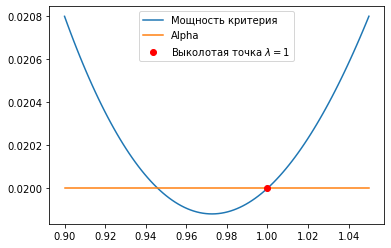

In [104]:
# Если при справедливости Н0 вероятность отвергнуть Н0 меньше, чем при справедливости Н1, то
# критерий несмещенный (alpha < мощности теста)
Lambda = np.linspace(0.9, 1.05, 100)
x1 = np.linspace(0.9, 1.05, 100)
Alpha = np.array([alpha] * 100)
eta = st.f(n - 1, m - 1)

plt.plot(Lambda,  1 - eta.cdf(Lambda * (eta1.isf(alpha/2))) + eta.cdf(Lambda * (eta.isf(1 - alpha/2)))\
        , label = 'Мощность критерия')
plt.plot(x1, Alpha, label = 'Alpha')
plt.plot(1, 1 - eta.cdf((eta1.isf(alpha/2))) + eta.cdf((eta.isf(1 - alpha/2))), 'ro', \
         label = 'Выколотая точка $\lambda = 1$')
plt.legend();

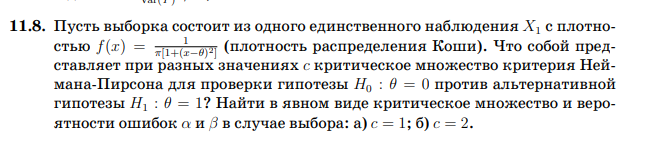

In [24]:
theta0, theta1, x = sp.symbols('theta_0, theta_1, x')
C1 = st.cauchy(loc = 1, scale = 1)
C0 = st.cauchy(loc = 0, scale = 1)
Pirson = sp.simplify((1/(sp.pi *(1 + (x - theta1)**2)))/(1/(sp.pi *(1 + (x - theta0)**2))))
Pirson

((theta_0 - x)**2 + 1)/((theta_1 - x)**2 + 1)

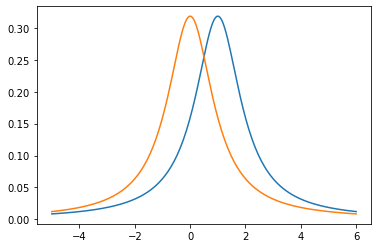

In [25]:
x_lin = np.linspace(-5,6,200)
plt.plot(x_lin, C1.pdf(x_lin))
plt.plot(x_lin, C0.pdf(x_lin))

In [26]:
Pirson = Pirson.subs([(theta0, 0), (theta1, 1)])
Pirson

(x**2 + 1)/((1 - x)**2 + 1)

In [27]:
c = 1
cvalue = sp.solve(Pirson - c, x)[0]
cvalue = float(cvalue)
alpha = C0.cdf(cvalue)
beta = C1.sf(cvalue)
print(f'Критичесикая область ({cvalue}; + inf)')
print(f'alpha = {alpha}, beta = {beta}')

Критичесикая область (0.5; + inf)
alpha = 0.6475836176504333, beta = 0.6475836176504333
